In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns

In [ ]:
import warnings
import pickle
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')
df1 = df.copy()
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
num =  []
cat = []

for i in df.columns:
  if df[i].dtype == 'O':
    cat.append(i)
  else:
    num.append(i)

num

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [ ]:
cat

['label']

In [ ]:
valNull = []

for i in df.columns:
  if df[i].isnull().sum()!=0:
    valNull.append(i)

print(valNull)

[]


No Null values


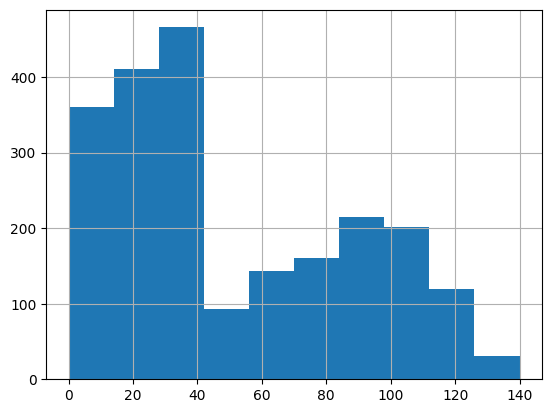

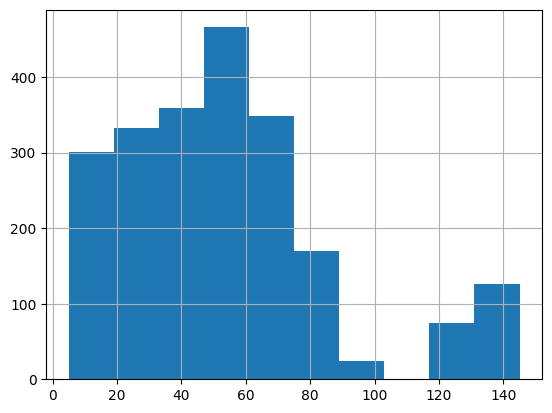

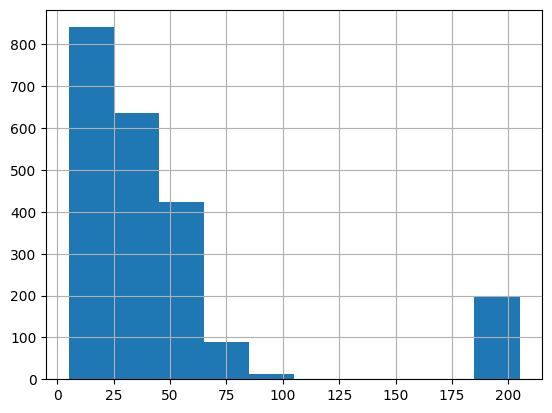

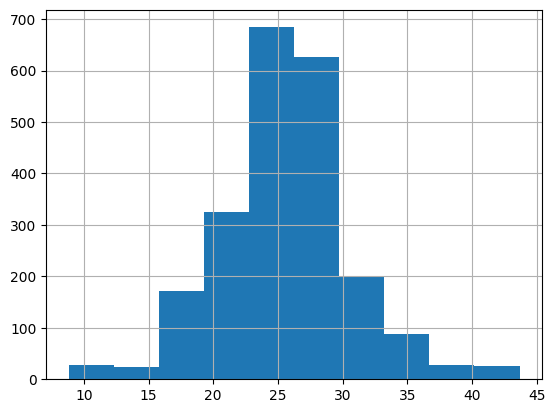

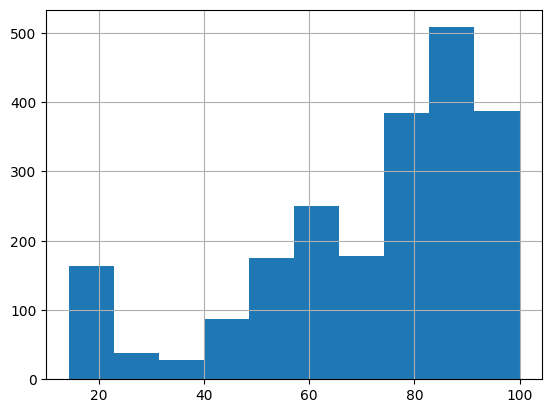

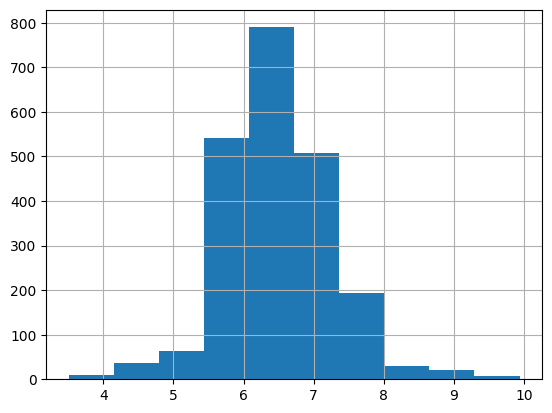

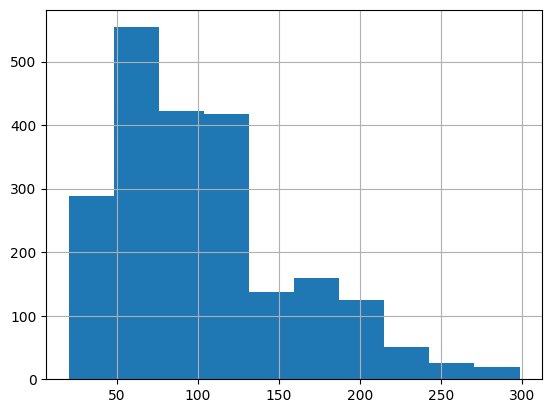

In [ ]:
for i in num:
  df1[i].hist()
  plt.show()
  print("\n")

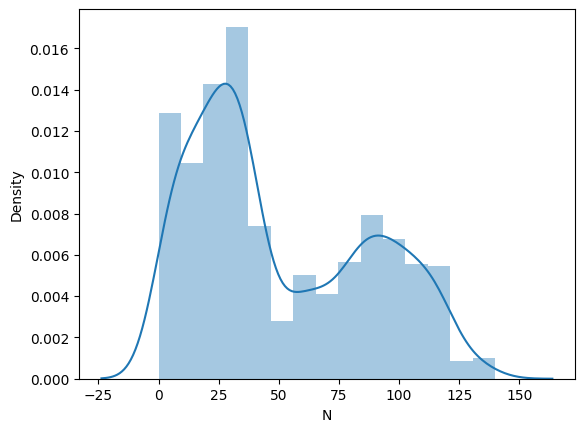

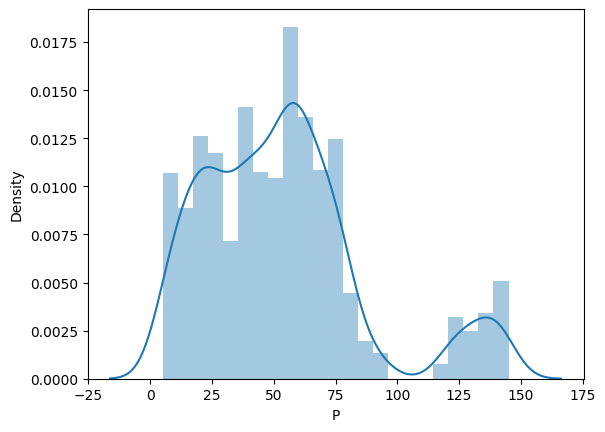

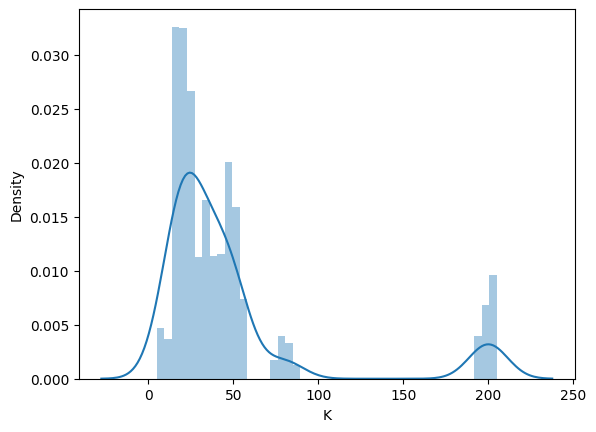

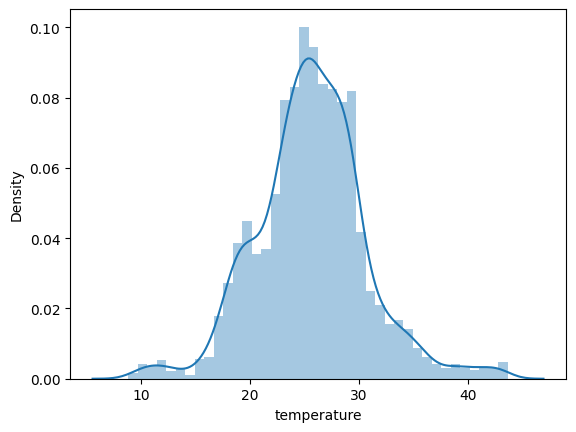

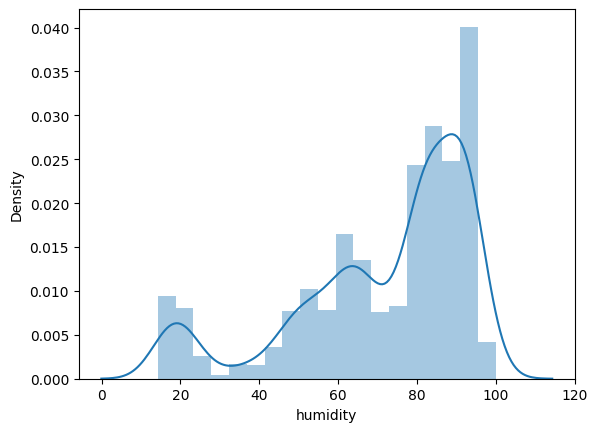

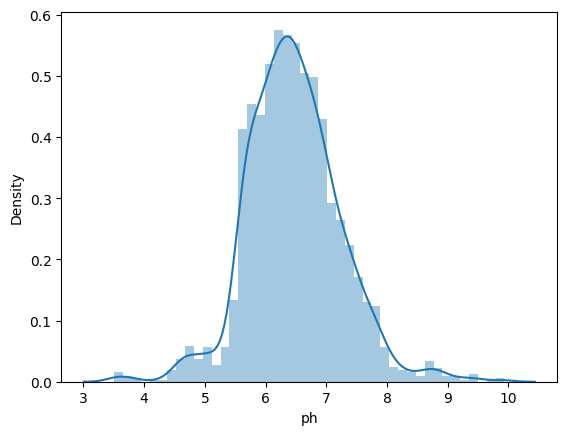

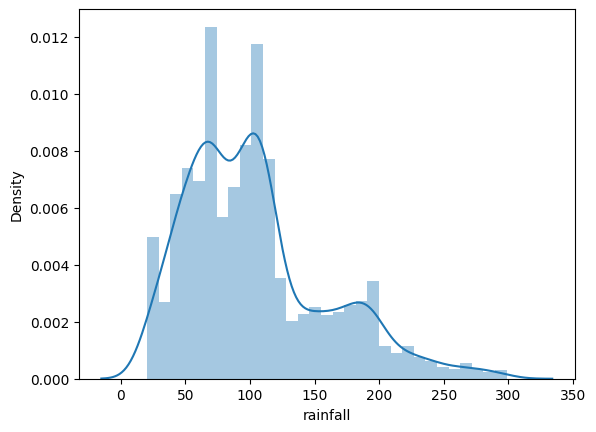

In [ ]:
for i in num:
    sns.distplot(df1[i])
    plt.show()

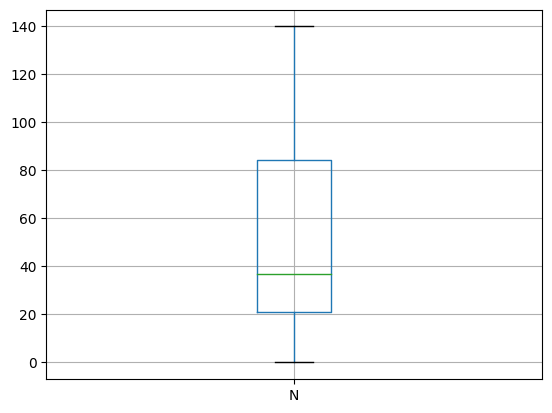

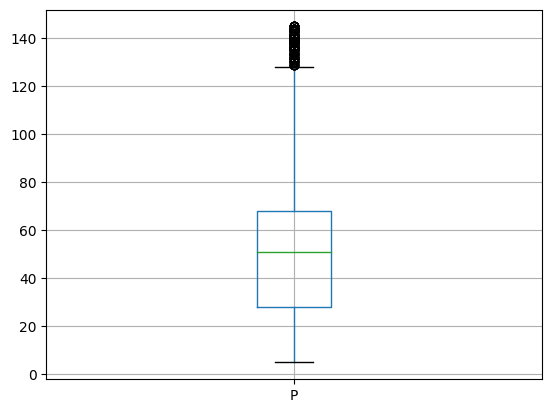

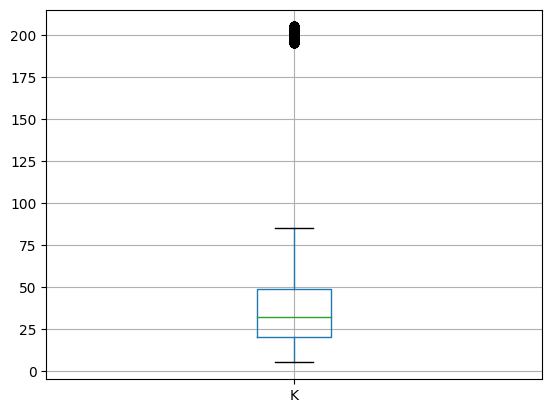

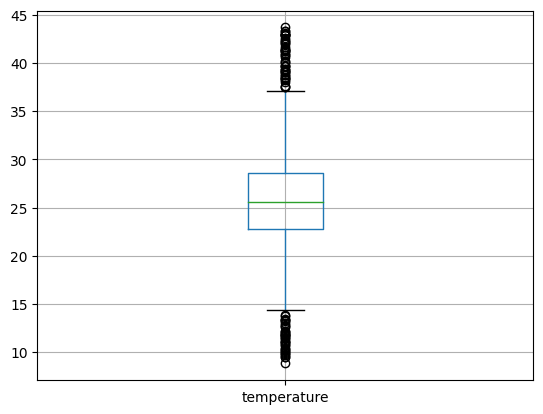

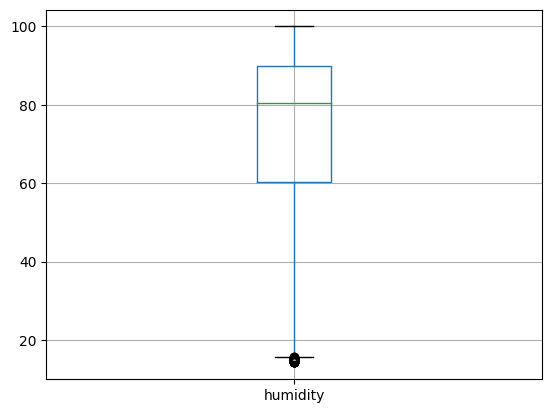

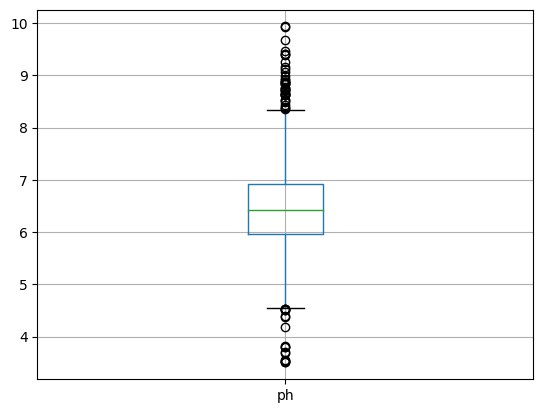

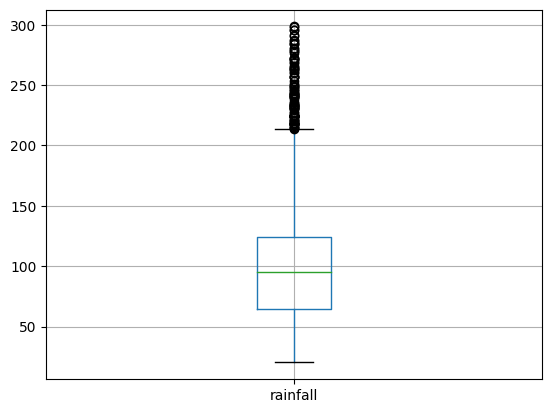

In [ ]:
for i in num:
    df1.boxplot(i)
    plt.show()
    print("\n\n")

In [ ]:
df1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
for i in num:
  IQR = df1[i].quantile(0.75) - df1[i].quantile(0.25)

  u_p = df1[i].quantile(0.75) + 1.5*IQR
  l_p = df1[i].quantile(0.25) - 1.5*IQR

  df1.loc[df1[i]>=u_p,i] = u_p
  df1.loc[df1[i]<=l_p,i] = l_p

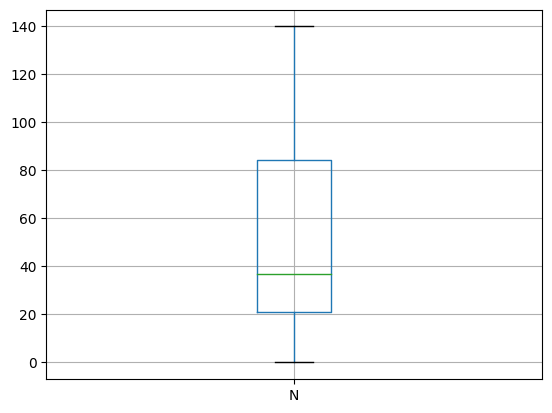

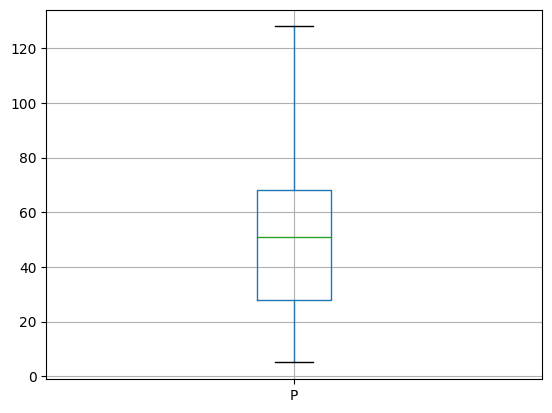

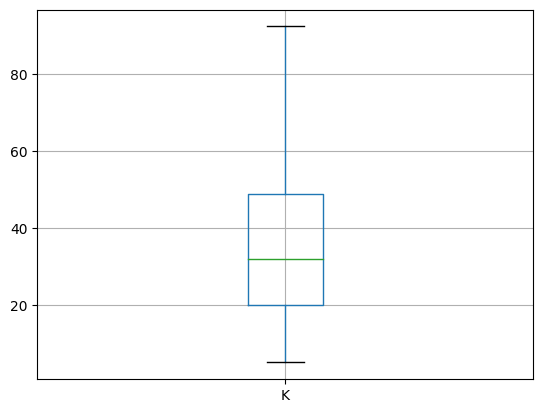

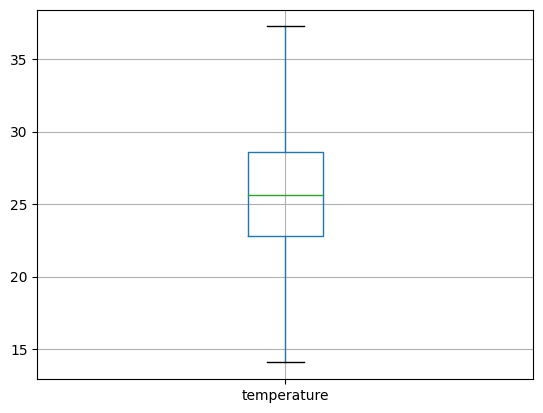

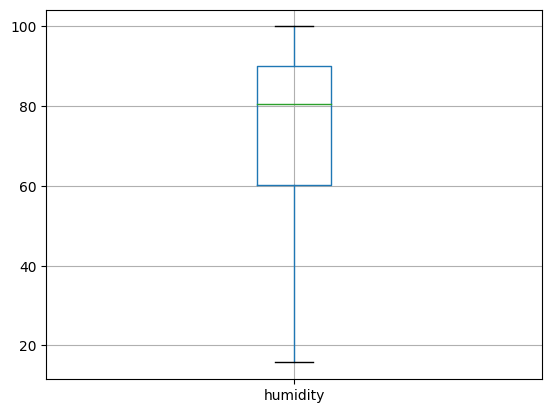

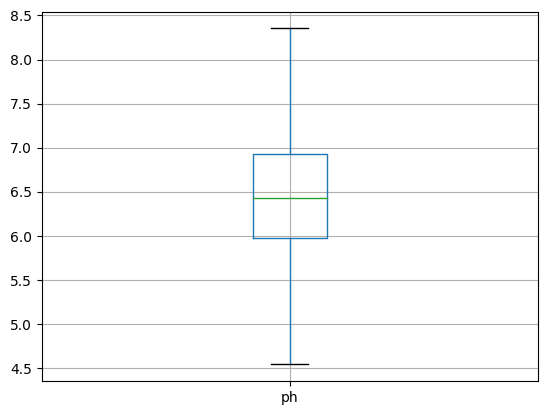

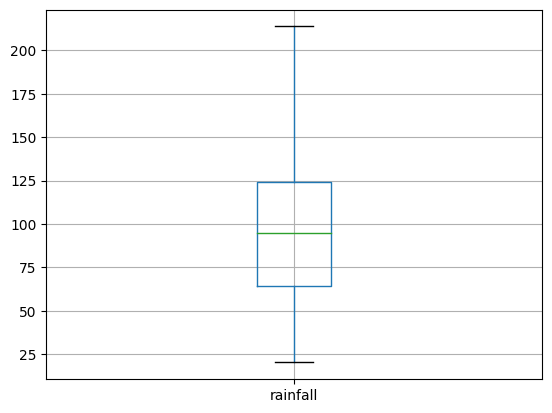

In [ ]:
for i in num:
    df1.boxplot(i)
    plt.show()
    print("\n\n")

In [ ]:
box = []
for i in num:
  if (df1[i] <= 0).sum() == 0:
    box.append(i)

box

['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

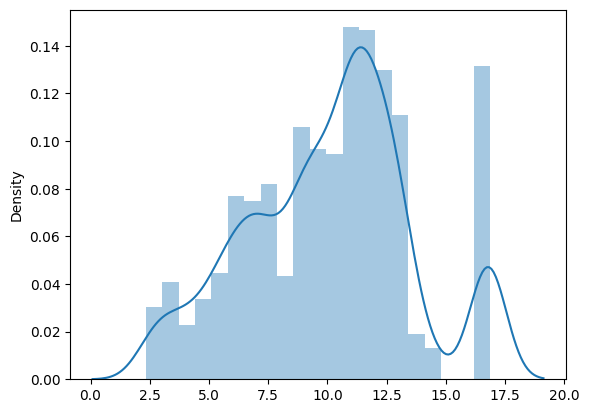

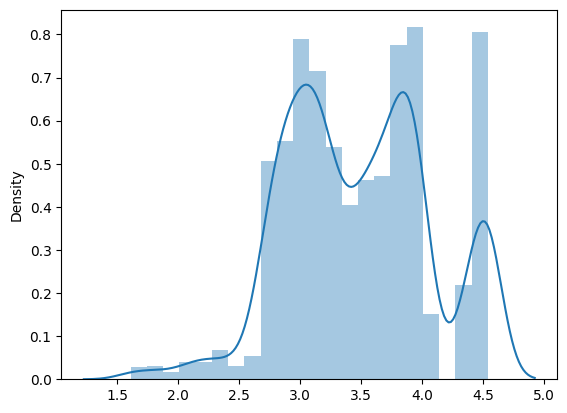

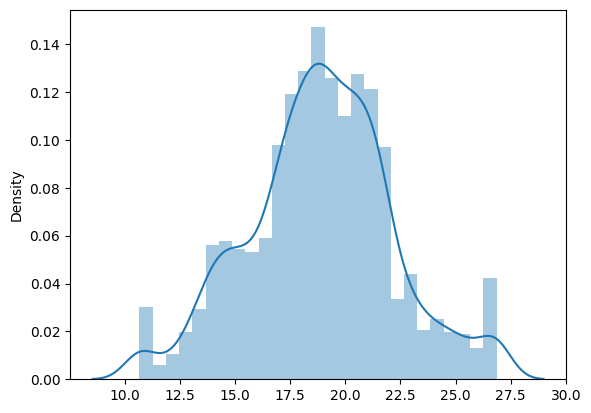

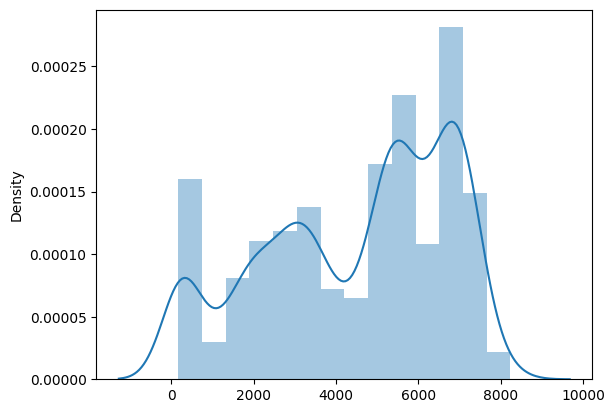

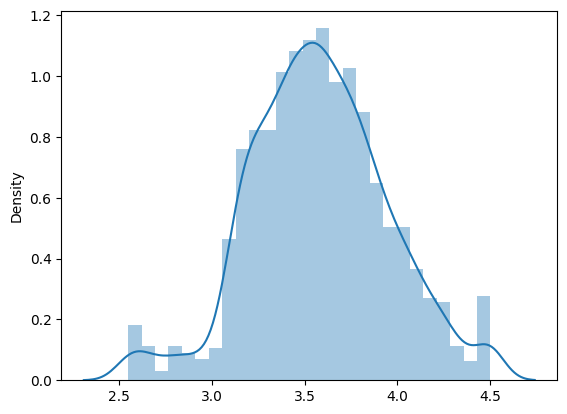

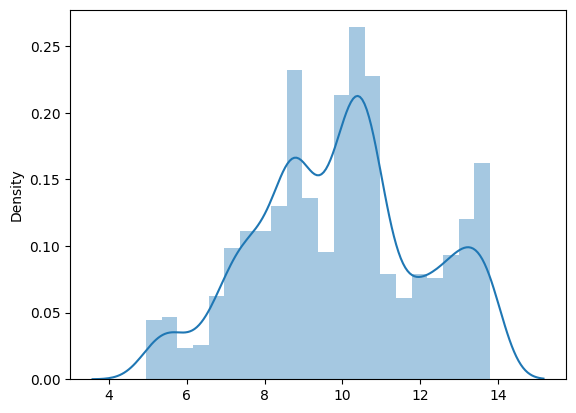

In [ ]:
for i in box:
  data,params=stat.boxcox(df1[i])
  df1[i] = data
  sns.distplot(data)
  plt.show()


In [ ]:
df1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df1['label'].nunique()

22

In [ ]:
from sklearn import preprocessing
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['label']= label_encoder.fit_transform(df1['label'])

df1['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

20- rice
11 - maize
3 - chickpea
9 - kidnebeanks
18 - pigenpeas
13 -  mothbeans
14 - mungbean
2 - bkackgram
10 - lentil
19 - pomegrenate
1 - banana
12 - mango
7 - grapes
21 - watermelon
15 - muskmelon
0 - apple
16 - oraange
17 - papaya
4 - coconut
6 - cotton
8 - jute
5 - coffee

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   float64
 1   P            2200 non-null   float64
 2   K            2200 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 137.6 KB


In [ ]:
df1.to_csv('file.csv')

In [ ]:
X=df1.drop(columns='label',axis=0)
y=df1.label

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,9.467063,3.768404,15.610858,5409.298140,3.606487,13.508647
1,85.0,11.253719,3.720595,16.243527,5176.468975,3.874095,13.782226
2,60.0,10.942081,3.791482,17.115278,5453.899252,4.261813,13.782226
3,74.0,8.564197,3.695809,19.551162,5154.442453,3.845605,13.782226
4,78.0,9.467063,3.744784,15.076107,5353.770449,4.160923,13.782226
...,...,...,...,...,...,...,...
2195,107.0,8.427185,3.471852,19.747614,3458.325652,3.746010,12.836287
2196,99.0,5.198074,3.301368,20.191899,2466.805939,3.392859,11.279532
2197,118.0,8.287893,3.407088,17.907115,3548.631433,3.534979,12.710593
2198,117.0,8.146210,3.532693,19.399490,2068.666463,3.735373,11.253157


In [ ]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.15)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [35]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9818181818181818


In [36]:
pickle.dump(clf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))